# Gauss-Jordan Elimination

## Loading ``latools``

This notebook requires the module `latools`. The file `latools.py` must be present in the same folder as this notebook. `latools.py` can be downloaded from the course site.

Run the cell below by clicking on it and pressing ``Shift-Enter`` (that is, hold down the ``Shift`` and ``Enter`` keys on the keyboard). 

In [1]:
from latools import *
from sympy import *
# If you are getting an error when printing matrices and vectors, 
# change the following line to use_latex=False
init_printing(use_latex=True)

__Note__: If you get errors running the code above, you probably don't have the file ``latools.py`` in the same directory as the notebook.

Running the cell will not produce any output, it just loads the functions from the module ``latools``. The code in the cell above does the following:

- **Line 1**: Load all functions from module ``latools`` into the current notebook.
- **Line 2**: Load the function ``init_printing`` from the module ``sympy``. Module ``latools`` uses ``sympy`` in the background.
- **Line 3**: Configure printing. The option ``use_latex=True`` tells ``sympy`` to use LaTeX to display matrices, which results in a nicely formatted output. You may need to change this to ``use_latex=False`` if you are getting errors, which may happen if LaTeX is not installed in your computer.

You will have to do these steps whenever you create a new notebook where you want to use the `latools` module

## Gaussian Elimination 

The process of *Gaussian Elimination* consists of a systematic series of steps designed to replace the coefficients in a linear system with zeros. This way, we get a simpler system that can be solved by direct inspection. There are two versions of the Gaussian elimination steps:

- *Gaussian Elimination*: This is a more efficient algorithm when a computer is used to solve the system, and reduces the system to what is called *row echelon form*. Then a method called *backsubstitution* is used to get the solution of the system.
- *Gauss-Jordan Elimination*: This reduces the system to what is called *reduced row echelon form*, and is better suited for solving systems "by hand". This is the method illustrated in this notebook.

Notice that, when using these algorithms, we operate on the *augmented matrix* of the system, since the variable names are irrelevant for the solution process.

To perform Gaussian eliminations, we will use the following two functions from the module ``latools``:

- ``rational_matrix(A)``: transforms the entries of matrix ``A`` into rational values. Helpful if we want to do exact computations.
- ``rop(A, *rop_seq, inplace=False, symbolic=True)``: performs a sequence of row operations on the matrix ``A``.

Each row operation is entered as a string, which must be in one of the following forms:

- Swapping: **`Ri<=>Rj`**, where i and j are two integers
- Scaling: **`Ri*(c)=>Ri`**, where i is an integer and c is a constant. Notice that the parenthesis are always required.
- Scaling-and-adding: **`Ri*(c)+Rj=>Rj`**, where i and j are integers and c is a constant. 

Notice that in the last two cases the parenthesis around the factor ``c`` are **always** required. By default, the row operations are not done in-place, but a new matrix is returned. Setting ``inplace=True`` causes the operations to be done in-place.

Notice that the row and column numbers are adjusted so that indexing starts with $1$, not $0$, as is the Python default convention.

Let's now see some examples of how to use Gaussian elimination:

### Example 1:

Solve the linear system:

\begin{alignat*}{6}
2x  &{}+{}& 2y &{}+{}& 5z &{}={}& 11\\
4x  &{}+{}& 6y &{}+{}& 8z &{}={}& 0\\
 x  &{}+{}&  y &{}+{}&  z &{}={}& 4
\end{alignat*}


### Augmented matrix setup

To use Gaussian Elimination, we start by entering the _augmented matrix_ for the system:

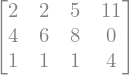

In [2]:
A = rational_matrix([[  2, 2, 5, 11],
                     [  4, 6, 8,  0],
                     [  1, 1, 1,  4]])
A

### Step 1

We start with the first row of the matrix. The first nonzero element of this row is at position $(1,1)$, which is the first pivot. The first step is to multiply this row by $1/2$ to make the pivot equal to 1.

We do the operation on matrix `A` and store the result in a new matrix `A1`. Storing each step in a new matrix makes it easier to correct mistakes:

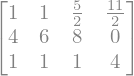

In [3]:
A1 = rop(A, 'R1*(1/2)=>R1')
A1

We now want to use the pivot at position $(1,1)$ to get zeros in all other possitions. To do the eliminations, we multiply row one by the appropriate constant and add to each of the other rows. Notice that we can do two row operations in a single cell:

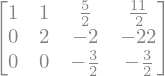

In [4]:
A2 = rop(A1, 'R1*(-4)+R2=>R2', 'R1*(-1)+R3=>R3')
A2

### Step 2

We now move to row $2$. The next pivot is at position $(2, 2)$. To get a $1$ in the pivot position, we multiply row $2$ by $1/2$:

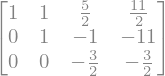

In [5]:
A3 = rop(A2, 'R2*(1/2)=>R2')
A3

Now use the pivot to get zeros on the other rows on column 2. Notice that we already have a zero at position $(3,2)$, so we only need to eliminate the nonzero element on position $(1,2)$.

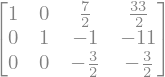

In [6]:
A4 = rop(A3, 'R2*(-1)+R1=>R1')
A4

### Step 3

The pivot now is at position $(3,3)$. To get a $1$ in the pivot position, we multiply row $3$ by $-2/3$: 

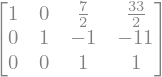

In [7]:
A5 = rop(A4, 'R3*(-2/3)=>R3')
A5

Now, to get zeros elswere on column 3 we do the following row operations:

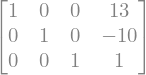

In [8]:
A6 = rop(A5, 'R3*(-7/2)+R1=>R1', 'R3*(1)+R2=>R2')
A6

This matrix is in _reduced row echelon form_ (RREF) (notice the identity matrix on the left. We now translate this matrix back into a system of equations:

\begin{alignat*}{6}
1x &{}+{}& 0y &{}+{}& 0z &{}={}& 13\\
0x &{}+{}& 1y &{}+{}& 0z &{}={}& -10\\
0x &{}+{}& 0y &{}+{}& 1z &{}={}&  1\\
\end{alignat*}

This system can be trivially solved, and yields the unique solution $x=13$, $y=-10$, $z=1$. We express this in terms of the solution set for the system:

$$
\left\{
\begin{bmatrix}
13\\
-10\\
1\\
\end{bmatrix}
\right\}
$$

Notice that we prefer to represent vectors as _column vectors_.


### Example 2

Find the solution set of the system of linear equations:

\begin{alignat*}{17}
- 2 x_{1} &{}-{}& 2 x_{2} &{}+{}& 4 x_{3} &{}-{}& 2 x_{4} &{}+{}& 6 x_{5} &{}+{}& x_{6} &{}+{}& x_{7} &{}={}& 5\\ 
- 2 x_{1} &{}-{}& 3 x_{2} &{}+{}& 7 x_{3} &{}-{}& 3 x_{4} &{}+{}& 9 x_{5} &{}-{}& x_{6} &{}-{}& 3 x_{7} &{}={}&-9\\ 
&{}{}&x_{2} &{}-{}& 3 x_{3} &{}+{}& x_{4} &{}-{}& 3 x_{5} &{}+{}& 2 x_{6} &{}-{}& 2 x_{7} &{}={}&-4\\ 
x_{1} &{}+{}& x_{2} &{}-{}& 2 x_{3} &{}+{}& x_{4} &{}-{}& 3 x_{5} &{}+{}& 2 x_{6} &{}-{}& 2 x_{7} &{}={}&-2\\ 
x_{1} &{}+{}& 2 x_{2} &{}-{}& 5 x_{3} &{}+{}& 2 x_{4} &{}-{}& 6 x_{5} &{}-{}& x_{6} &{}-{}& 2 x_{7} &{}={}&-10\\ 
\end{alignat*}

### Augmented matrix setup

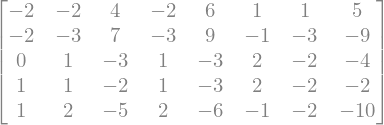

In [9]:
A = rational_matrix([[-2, -2,  4, -2,  6,  1,  1,   5],
                     [-2, -3,  7, -3,  9, -1, -3,  -9],
                     [ 0,  1, -3,  1, -3,  2, -2,  -4],
                     [ 1,  1, -2,  1, -3,  2, -2,  -2],
                     [ 1,  2, -5,  2, -6, -1, -2, -10]])
A

### Step 1

The first pivot is $-2$ at position $(1,1)$

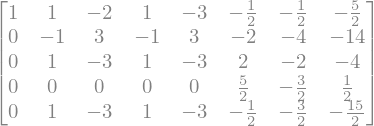

In [10]:
A1 = rop(A, 'R1*(-1/2)=>R1', 
         'R1*(2)+R2=>R2', 'R1*(-1)+R4=>R4', 'R1*(-1)+R5=>R5')
A1

### Step 2

The pivot in Step 2 is $-1$ at position $(2,2)$

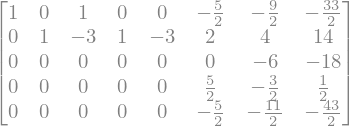

In [11]:
A2 = rop(A1, 'R2*(-1)=>R2', 
         'R2*(-1)+R1=>R1', 'R2*(-1)+R3=>R3', 'R2*(-1)+R5=>R5')
A2

### Step 3
In this step, we move to the third row of the matrix. However, notice that the element at position $(3,3)$ is equal to $0$, so it cannot be used as a pivot. Furthermore, notice that all elements that are _below_ position $(3,3)$ are zero, so they cannot be used as a pivot. The first column that has an element that can be used as pivot is column 6. We can use either $5/2$ (position $(4,6)$) or $-5/2$ (position $(5,6)$) as the next pivot. Let's say we decide to use $5/2$. Since we need the pivot to be in row $3$, we first swap rows $3$ and $4$:

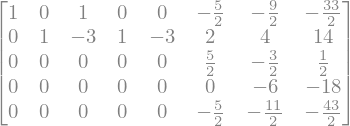

In [12]:
A3 = rop(A2, 'R3<=>R4')
A3

Now we can do pivoting with the element $5/2$ at position $(3,6)$:

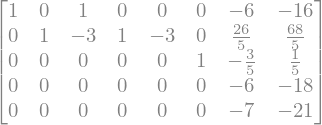

In [13]:
A4 = rop(A3, 'R3*(2/5)=>R3', 
         'R3*(5/2)+R1=>R1', 'R3*(-2)+R2=>R2', 'R3*(5/2)+R5=>R5')
A4

### Step 4

The next pivot is $-6$ at position $(4,7)$:

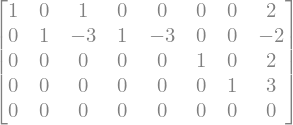

In [14]:
A5 = rop(A4, 'R4*(-1/6)=>R4', 
         'R4*(6)+R1=>R1', 'R4*(-26/5)+R2=>R2', 
         'R4*(3/5)+R3=>R3', 'R4*(7)+R5=>R5')
A5

Notice that the last row consists of only zeros. So, there can be no more pivots, and the algorithm finishes.

To interpret the results, first notice that each of the first seven columns of the final matrix corresponds to one of the variables $x_1,\ldots,x_7$, and the last column corresponds to the right-hand side of the system. We can thus go back to the following system formulation:

\begin{alignat*}{17}
x_{1} &{} {}&        &{}+{}&  x_{3} &{} {}&        &{} {}&        &{} {}&     &{} {}&       &{}={}& 2\\ 
      &{} {}&  x_{2} &{}-{}& 3x_{3} &{}+{}&  x_{4} &{}-{}& 3x_{5} &{} {}&     &{} {}&       &{}={}&-2\\ 
      &{} {}&        &{} {}&        &{} {}&        &{} {}&        &{} {}& x_6 &{} {}&       &{}={}&2\\ 
      &{} {}&        &{} {}&        &{} {}&        &{} {}&        &{} {}&     &{} {}& x_{7} &{}={}&3\\ 
      &{} {}&        &{} {}&        &{} {}&        &{} {}&        &{} {}&     &{} {}& 0     &{}={}&0\\ 
\end{alignat*}

Now we classify the variables in two classes:

- Pivot variables: these are the variables that correspond to columns that have pivots: $x_1$, $x_2$, $x_6$ and $x_7$
- Free variables: these are the variables that correspond to columns without pivots: $x_3, $x_4$ and $x_5$

Notice also that the last equation $0=0$, can be ignored, since it is always true, for any assignment of values to the variables.

We can express the pivot variables in terms of the free variables:

\begin{align*}
x_1&=2-x_3\\
x_2&=-2+3x_3-x_4+3x_5\\
x_6&=2\\
x_7&=3
\end{align*}

This means that we can freely choose the values of the variables $x_3$, $x_4$ and $x_5$, and then compute the corresponding values of the remaining variables. We can thus express the solution set of the system using _set comprehension notation_:

$$
\left\{
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4\\x_5\\x_6\\x_7
\end{bmatrix}
\;
\left|
\;
\begin{matrix}
x_1=2-x_3,\\
x_2=-2+3x_3-x_4+3x_5,\\
x_6=2,\\
x_7=3,
\end{matrix}
\right.
\right\}
$$
Notice that this is a set of 7-dimensional vectors, that is, a subset of $\mathbb{R}^7$.

It is somewhat more concise to "plug in" the values of the pivot variables $x_1$, $x_2$, $x_6$ and $x_7$ in the vector to the left:

$$
\left\{
\left.
\begin{bmatrix}
2-x_3\\-2+3x_3-x_4+3x_5\\x_3\\x_4\\x_5\\2\\3
\end{bmatrix}
\;
\right|
\;
x_3\in\mathbb{R},x_4\in\mathbb{R},x_5\in\mathbb{R}
\right\}
$$

We can furthermore write this using vector operations:

$$
\left\{
\left.
\begin{bmatrix}
2\\-2\\0\\0\\0\\2\\3
\end{bmatrix}
+x_3
\begin{bmatrix}
-1\\3\\1\\0\\0\\0\\0
\end{bmatrix}
+x_4
\begin{bmatrix}
0\\-1\\0\\1\\0\\0\\0
\end{bmatrix}
+x_5
\begin{bmatrix}
0\\3\\0\\0\\1\\0\\0
\end{bmatrix}
\;
\right|
\;
x_3,x_4,x_5\in\mathbb{R}
\right\}
$$

As we will learn later, this will characterize the solution set as an _affine space of dimension 3_

## Exercises:

Solve the following systems using Gaussian Elimination. A complete solution should include a representation of the solution set as a combination of vectors.

*Note*: To add a computation cell, pres ``Esc`` to enter command mode. The border of the current cell will then change to a blue line. Then, press ``a`` or ``b``. ``a`` adds a cell **a**bove, ``b`` adds a cell **b**elow the current cell.

#### Exercise 1

\begin{alignat*}{7}
     &&        && 6x_3  &&       &+& 19x_5 &+& 11x_6 &=& -27\\
3x_1 &{}+{}& 12x_2 &{}+{}& 9x_3 &{}-{}& 6x_4 &{}+{}& 26x_5 &{}+{}& 31x_6 &{}={}& -63\\
 x_1 &{}+{}&  4x_2 &{}+{}& 3x_3 &{}-{}& 2x_4 &{}+{}& 10x_5 &{}+{}&  9x_6 &{}={}& -17\\
-x_1 &{}-{}&  4x_2 &{}-{}& 4x_3 &{}+{}& 2x_4 &{}-{}& 13x_5 &{}-{}& 11x_6 &{}={}& 22\\
\end{alignat*}


#### Exercise 2

\begin{alignat*}{4}
 x_1 &{}+{}&  4x_2 &{}-{}& 3x_3 &{}={}&  2\\
3x_1 &{}-{}&  2x_2 &{}-{}&  x_3 &{}={}& -1\\
-x_1 &{}+{}& 10x_2 &{}-{}& 5x_3 &{}={}&  3\\
\end{alignat*}




#### Exercise 3

\begin{alignat*}{5}
32x &{}+{}&  2y &{}+{}& 4z &{}+{}& \frac{1}{2}t &{}={}&  15\\
48x &{}+{}& 12y &{}+{}&  z &{}+{}&          27t &{}={}& 100\\
40x &{}+{}&   y &{}+{}& 8z &{}+{}&            t &{}={}& 10
\end{alignat*}

This is the system from the diet problem example. Since food quantities should not be negative, find a solution whith all components positive. Is that a breakfast you would like to have?